##### LETS GROW MORE: LGM-VIP VIRTUAL INTERNSHIP #LGMVIPAUG2021
### Domain: Data Science

# Level: Beginner

# Task 1: Iris Flowers Classification ML Project :

# Developed by: Kirti Ashok Sawant

 DataSet LInk :

http://archive.ics.uci.edu/ml/machine-learning-databases/iris/


 Problem statement:Predicting the class of the iris based on the four features (Sepal_Length,	Sepal_Width,	Petal_Length,Petal_Width)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from numpy import median
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.cluster import KMeans


# Loading dataset

In [2]:
data=pd.read_csv("D://Iris.csv")
data
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# ANALYSING THE DATASET

In [3]:
data.shape  

(150, 5)

### The dataset consists of 150 rows and 5 columns/attribute

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### There are 4 float and 1 object column
#### There are no null value

In [5]:
# To cheack null values
data.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

# There is no missing observtaion in dataset

In [6]:
# To know labels of dataset
data.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

In [7]:
# To return statistics of dataset
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#To return top 5 rows of dataset
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# To return last 5 rows of dataset
data.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
# To return how many unique values are there in each columns
data.nunique()

Sepal_Length    35
Sepal_Width     23
Petal_Length    43
Petal_Width     22
Species          3
dtype: int64

In [11]:
#To return unique items in the species columns
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
data.count()

Sepal_Length    150
Sepal_Width     150
Petal_Length    150
Petal_Width     150
Species         150
dtype: int64

In [13]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [14]:
# Finding mean of Species columns by using grouping method

data.groupby(data.Species).mean()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [15]:
# Finding median of Species columns by using grouping method
data.groupby(data.Species).median()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


# EXPLORATORY DATA ANALYSIS

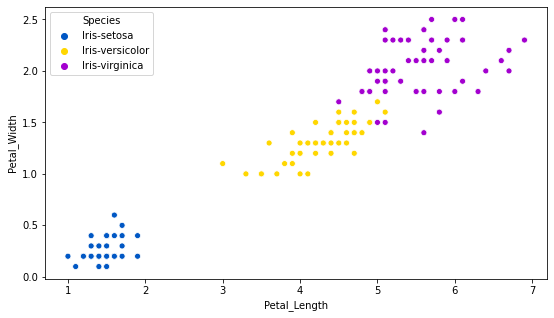

In [16]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data,x='Petal_Length',y='Petal_Width',hue='Species',palette='prism')
plt.show()                

<function matplotlib.pyplot.show(*args, **kw)>

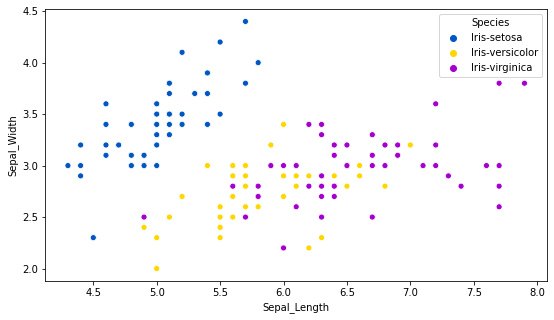

In [17]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=data,x='Sepal_Length',y='Sepal_Width',hue='Species',palette='prism')
plt.show

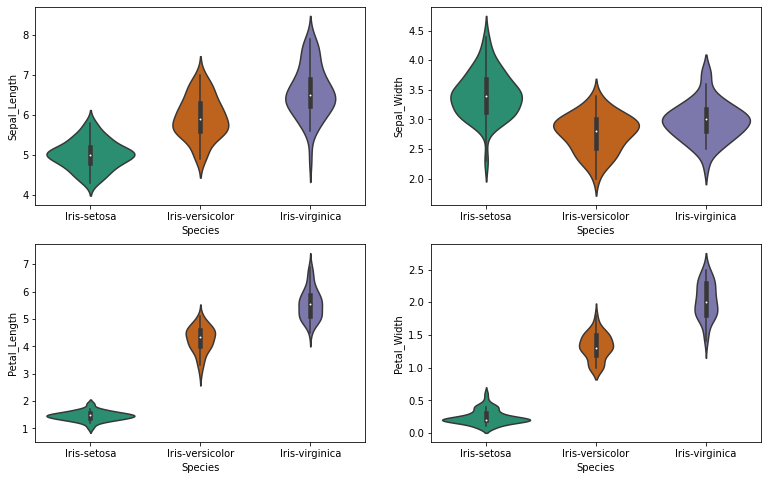

In [19]:
sns.set_style=('dark')
sns.set_palette('Dark2')
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(data=data,x='Species',y='Sepal_Length')
plt.subplot(2,2,2)
sns.violinplot(data=data,x='Species',y='Sepal_Width')
plt.subplot(2,2,3)
sns.violinplot(data=data,x='Species',y='Petal_Length')
plt.subplot(2,2,4)
sns.violinplot(data=data,x='Species',y='Petal_Width')
plt.show()

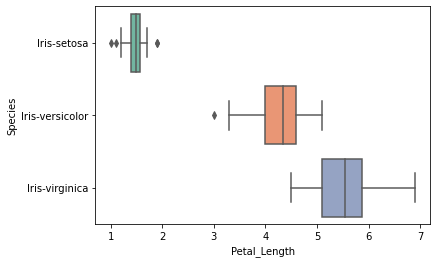

In [20]:
# boxplot is used for finding central tendency and outliers
sns.set_palette("Set2")
sns.boxplot(data=data,x='Petal_Length',y='Species')
plt.show()

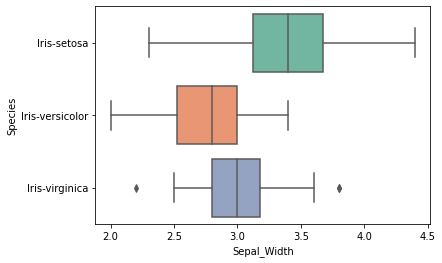

In [21]:
sns.boxplot(data=data,x='Sepal_Width',y='Species')
plt.show()

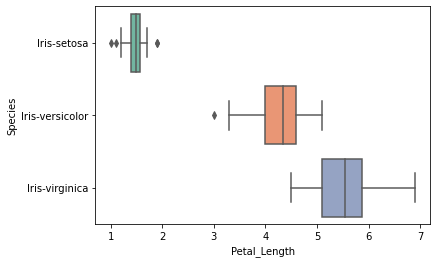

In [22]:
sns.boxplot(data=data,x='Petal_Length',y='Species')
plt.show()

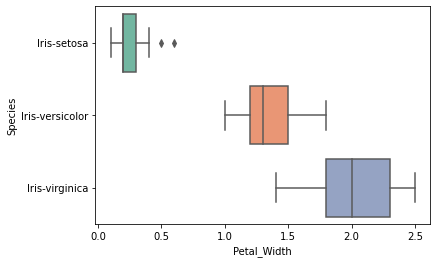

In [23]:
sns.boxplot(data=data,x='Petal_Width',y='Species')
plt.show()

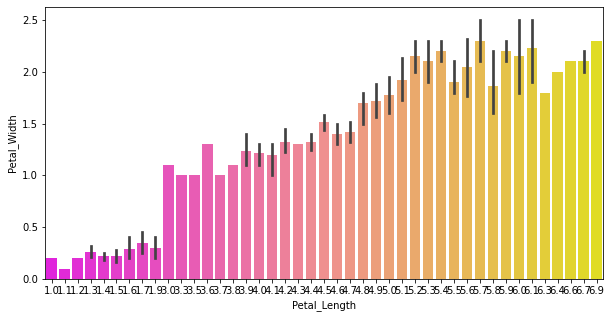

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Petal_Length',y='Petal_Width',data=data,palette='spring')
plt.show()

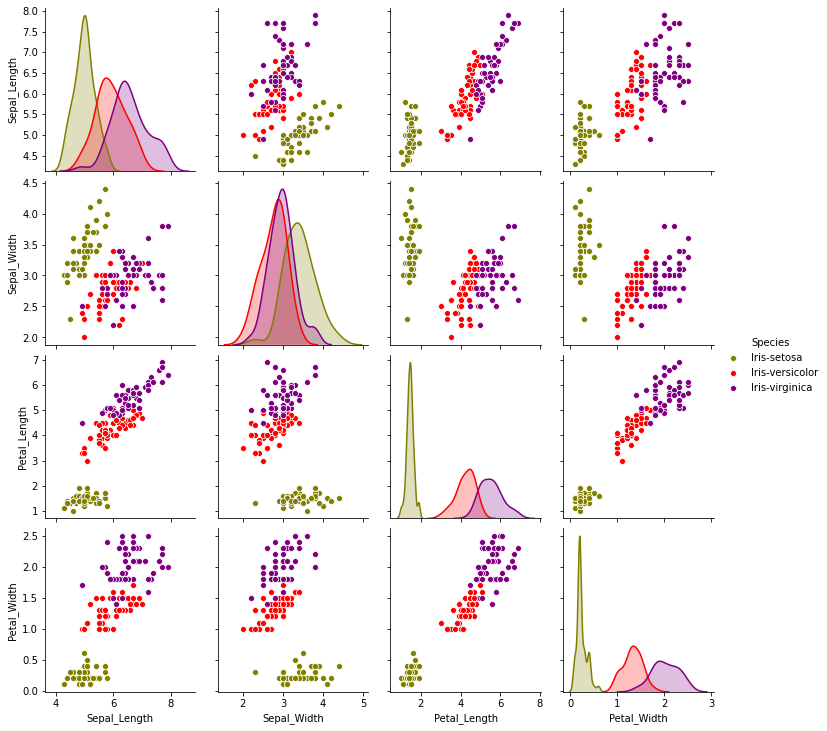

In [25]:
sns.pairplot(data,hue='Species',palette='brg_r')
plt.show()

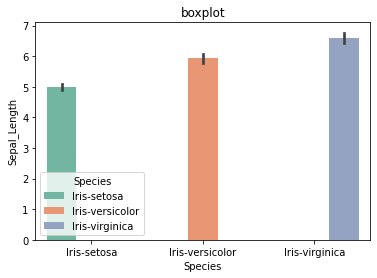

In [26]:
sns.barplot(x='Species',y='Sepal_Length',data=data,hue='Species')
plt.title('boxplot')
plt.show()

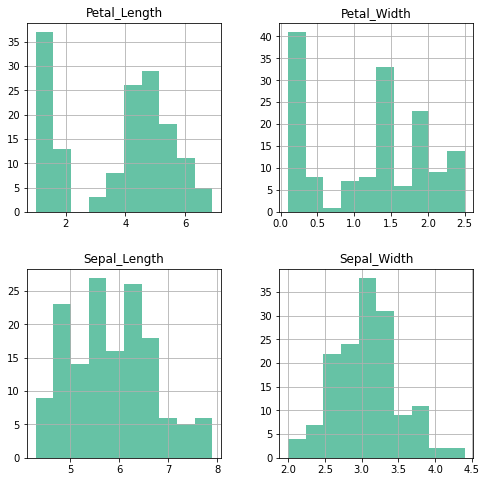

In [27]:
data.hist(figsize=(8,8));

### Petal _Length & Petal _width is bimodel.
#### Sepal _Length & Sepal _Width is Unimodel and seems to be normally distributed

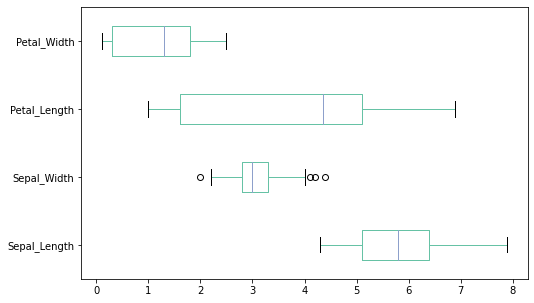

In [28]:
data.plot(kind='box',figsize=(8,5),vert=False);

# SepalWidthCm seems to have outliers.

In [29]:
#To cheack Correlation
data.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


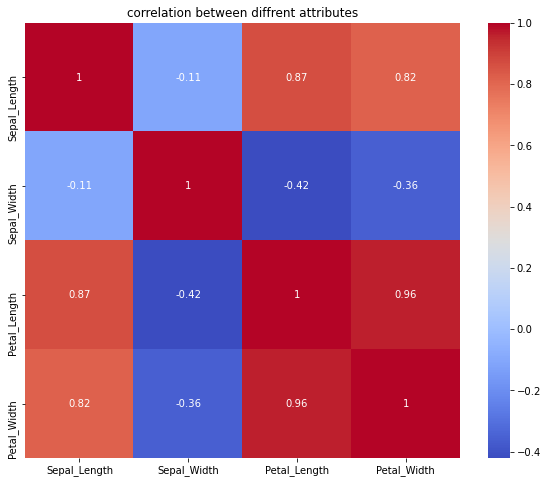

In [30]:
# plotting heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True,cmap='coolwarm')
plt.title('correlation between diffrent attributes')
plt.show()

# DATA PREPROCESSING

In [31]:
# label encoder is for converting categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
data['Species']=le.fit_transform (data['Species'])
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
data['Species'].unique()

array([0, 1, 2])

# [Spliting the dataset into X & y]

In [34]:
# x is feature so selection of whole rows & all columns expected target column
x=data.iloc[:,0:4]
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# y is target variable
y=data.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
x_train.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [37]:
y_train.head()

54     1
108    2
112    2
17     0
119    2
Name: Species, dtype: int32

In [38]:
x_test.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [39]:
y_test.head()

14     0
98     1
75     1
16     0
131    2
Name: Species, dtype: int32

In [40]:
print('Length of x_train is:',len(x_train))
print('Length of x_test is:',len(x_test))
print('Length of y_train is:',len(y_train))
print('Length of y_test is: ',len(y_test))

Length of x_train is: 112
Length of x_test is: 38
Length of y_train is: 112
Length of y_test is:  38


# Traning the model of diffrent Classification Algorithm

# Logistic Regression.

In [41]:
#importing Logistic Regression from sklearn library
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

#fitting training data into model
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [45]:
accuracy_score=(y_test,y_pred)

In [48]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix of Logistic Regression: \n' ,cm)
print('Accuracy Score of Logistic Regression',accuracy_score(y_test,y_pred))

confusion matrix of Logistic Regression: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy Score of Logistic Regression 0.9736842105263158


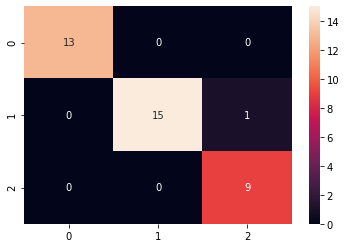

In [49]:
sns.heatmap(cm,annot=True)
plt.show()

# k- means


In [50]:
x = data.iloc[:,[0,1,2,3]].values

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Plotting the results

# Visualize the result and check the optimal number of cluster using Elbow method

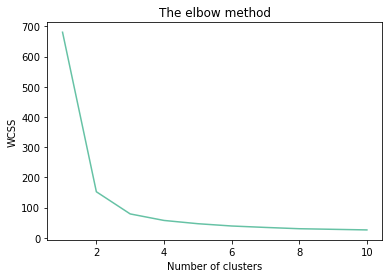

In [51]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# APPLYING K-MEANS

In [52]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

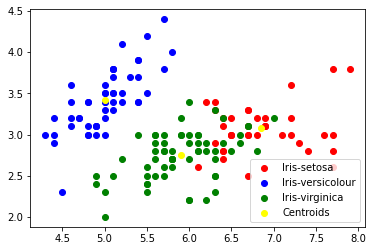

In [53]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()

# CONCLUSION :

From the above predictions K-MEANS model gave better accuracy.So by using this algorithm we can get good accuracy for this dataset.


                THANK YOU.